In [1]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models
database = config.Local_Database

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
Model_Folder = config.Sentiment_models
Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [4]:
# df1 = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert_model_short.csv")
# df2 = pd.read_csv(f"{finbert_models}/{Body}_{Model}_finbert_model_short_2.csv")

df1 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
df2 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short_2.csv")

In [5]:
ir1 = pd.read_csv(f"{database}/Other Data/2YIR.csv")
ir1 = ir1.rename(columns={'DATE': 'date', 'DGS2': 'IR2'})
df1 = df1.merge(ir1, how='left', on='date')
df2 = df2.merge(ir1, how='left', on='date')

In [6]:
print(df1.columns)
print(df2.columns)
print(df1.head())

Index(['Unnamed: 0', 'doc_num', 'date', 'title', 'segment', 'positive',
       'negative', 'neutral', 'sentiment', 'IR2'],
      dtype='object')
Index(['Unnamed: 0', 'doc_num', 'date', 'title', 'segment', 'tone', 'IR2'], dtype='object')
   Unnamed: 0 doc_num        date        title  \
0           0    ECB0  2015-02-19  ECB Minutes   
1           1    ECB0  2015-02-19  ECB Minutes   
2           2    ECB0  2015-02-19  ECB Minutes   
3           3    ECB0  2015-02-19  ECB Minutes   
4           4    ECB0  2015-02-19  ECB Minutes   

                                             segment  positive  negative  \
0  1. review of financial , economic and monetary...    0.0514    0.0180   
1  since the governing councils meeting in early ...    0.0530    0.8440   
2  a sharp decline in crude oil prices had reinfo...    0.4472    0.5227   
3  overall , sovereign bond yields had continued ...    0.0100    0.9730   
4  regarding the global situation , major develop...    0.0114    0.9676   

   ne

In [7]:
df_sent = df1.copy(deep=True)
df_sent = df1[['date', 'sentiment']]
df_sent = df_sent.groupby(['date']).mean()
df_sent['dup_number'] = df_sent.groupby(['date']).cumcount()+1
pivot = pd.pivot_table(df_sent, index='dup_number', columns='date', values ='sentiment', fill_value=None)

In [8]:
df_sent2 = df2.copy(deep=True)
df_sent2 = df2[['date', 'tone']]
df_sent2 = df_sent2.replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
df_sent2 = df_sent2.groupby(['date']).mean()
df_sent2['dup_number'] = df_sent2.groupby(['date']).cumcount()+1
pivot2 = pd.pivot_table(df_sent2, index='dup_number', columns='date', values ='tone', fill_value=None)

In [9]:
df_var = df1[['date', 'sentiment']]
df_var = df_var.groupby(['date']).agg(["mean", "median", "var"]).reset_index()
df_var.columns = ['_'.join(col).strip() for col in df_var.columns.values]
df_var = df_var.rename(columns={'date_': 'date'})
df_var['sentiment_sd'] = df_var['sentiment_var']**0.5
df_var = df_var.rename(columns={'sentiment_sd': 'sd'})
print(df_var.head())

df_var2 = df2[['date', 'tone']]
df_var2 = df_var2.replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
df_var2 = df_var2.groupby(['date']).agg(["mean", "median", "var"]).reset_index()
df_var2.columns = ['_'.join(col).strip() for col in df_var2.columns.values]
df_var2 = df_var2.rename(columns={'date_': 'date'})
df_var2['tone_sd'] = df_var2['tone_var']**0.5
df_var2 = df_var2.rename(columns={'tone_sd': 'sd'})
print(df_var2.head())

         date  sentiment_mean  sentiment_median  sentiment_var     sd
0  2015-02-19         -0.1905            0.0000         0.6581 0.8112
1  2015-04-02         -0.0987            0.0000         0.7650 0.8747
2  2015-05-21          0.1180            0.0000         0.7922 0.8901
3  2015-07-02          0.2414            1.0000         0.7506 0.8664
4  2015-08-13          0.1453            0.0000         0.7990 0.8939
         date  tone_mean  tone_median  tone_var     sd
0  2015-02-19    -0.1369       0.0000    0.5141 0.7170
1  2015-04-02    -0.1250       0.0000    0.6267 0.7916
2  2015-05-21    -0.1118       0.0000    0.6624 0.8139
3  2015-07-02    -0.0402       0.0000    0.5937 0.7706
4  2015-08-13    -0.0894       0.0000    0.5987 0.7738


In [10]:
# df1['date'] = df1['date'].str[0:7]
# df2['date'] = df2['date'].str[0:7]
df1 = df1[['date',  'positive', 'negative', 'neutral', 'sentiment']]

df1 = df1.groupby(['date']).mean().reset_index()
df2['tone'] = df2['tone'].replace({'positive': 1, 'neutral' : 0, 'negative' : -1})
df2 = df2[['date', 'tone']]
#df2 = df2.groupby(['date']).mean().reset_index()


In [11]:
df2['neg'] = df2['tone'].apply(lambda x: 1 if x < 0 else 0)
df2['pos'] = df2['tone'].apply(lambda x: 1 if x > 0 else 0)
df2['neu'] = df2['tone'].apply(lambda x: 1 if x == 0 else 0)

In [12]:

df_num_sent = df2.groupby('date')[['neg', 'neu', 'pos']].sum().reset_index()

#Add a column that is the sum of all the sentiments
df_num_sent['total'] = df_num_sent['neg'] + df_num_sent['neu'] + df_num_sent['pos']

df_num_sent['neg'] = df_num_sent['neg']/df_num_sent['total']
df_num_sent['neu'] = df_num_sent['neu']/df_num_sent['total']
df_num_sent['pos'] = df_num_sent['pos']/df_num_sent['total']

df_num_sent = df_num_sent.sort_values(by=['date'], ascending=True)

#df_num_sent['date'] = df_num_sent['date'].str[0:7]
df_num_sent = df_num_sent.groupby('date')[['neg', 'neu', 'pos']].mean().reset_index()
print(df_num_sent.head())

         date    neg    neu    pos
0  2015-02-19 0.3333 0.4702 0.1964
1  2015-04-02 0.3816 0.3618 0.2566
2  2015-05-21 0.3913 0.3292 0.2795
3  2015-07-02 0.3161 0.4080 0.2759
4  2015-08-13 0.3464 0.3966 0.2570


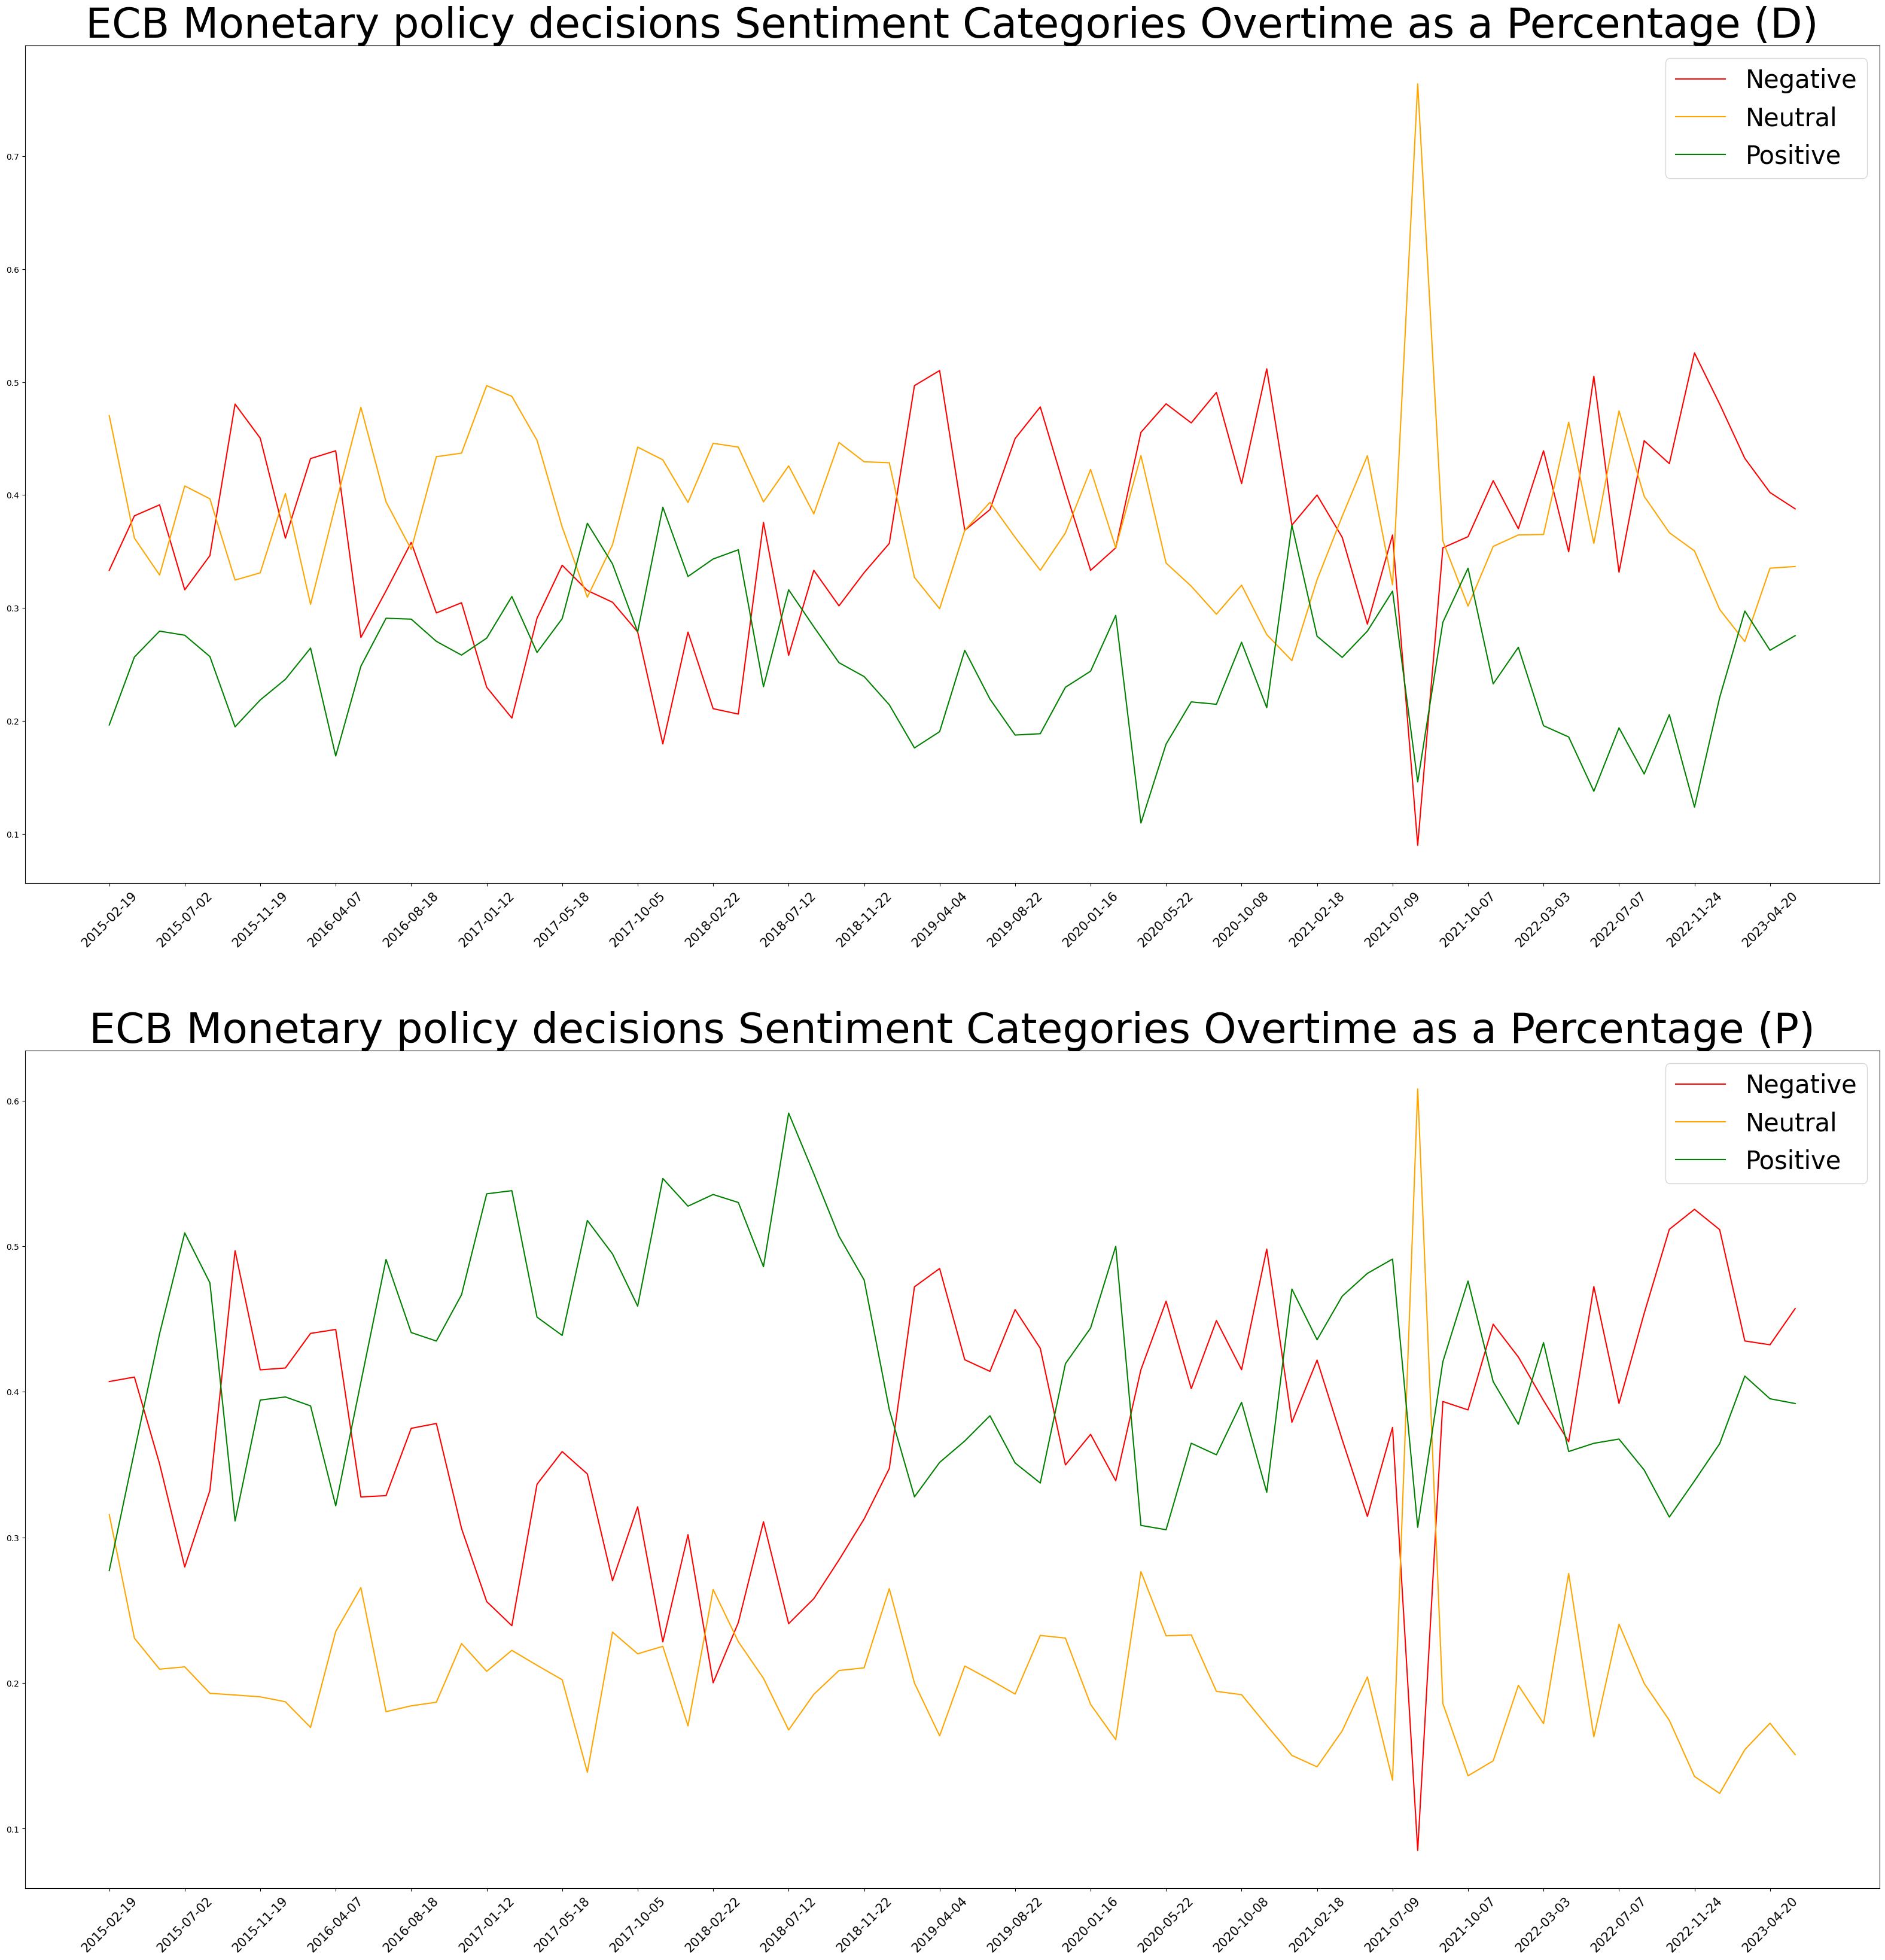

In [13]:
# Create a list of x-axis tick positions
num_ticks = 20 # Adjust this number as needed
x_tick_positions_0 = df_num_sent['date'].iloc[::len(df_num_sent) // num_ticks].tolist()
x_tick_positions_1 = df1['date'].iloc[::len(df1) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 40))

axs[0].plot(df_num_sent['date'], df_num_sent['neg'], color='red')
axs[0].plot(df_num_sent['date'], df_num_sent['neu'], color='orange')
axs[0].plot(df_num_sent['date'], df_num_sent['pos'], color='green')

axs[1].plot(df1['date'], df1['negative'], color='red')
axs[1].plot(df1['date'], df1['neutral'], color='orange')
axs[1].plot(df1['date'], df1['positive'], color='green')

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_title(f'{Body} {Model} Sentiment Categories Overtime as a Percentage (D)', fontsize=50)
axs[1].set_title(f'{Body} {Model} Sentiment Categories Overtime as a Percentage (P)', fontsize=50)

axs[0].legend(['Negative', 'Neutral', 'Positive'], fontsize=30)
axs[1].legend(['Negative', 'Neutral', 'Positive'], fontsize=30)

plt.show()

In [14]:
#Replace IR2 values that are '.' with the next value
ir1['IR2'] = ir1['IR2'].replace('.', method='ffill')
ir1 = ir1[ir1['date'] >= df1['date'].min()]
ir1 =  ir1[ir1['date'] <= df1['date'].max()]
ir1['IR2'] = ir1['IR2'].astype(float)
print(df1['date'].min())
print(df1['date'].max())

2015-02-19
2023-06-01


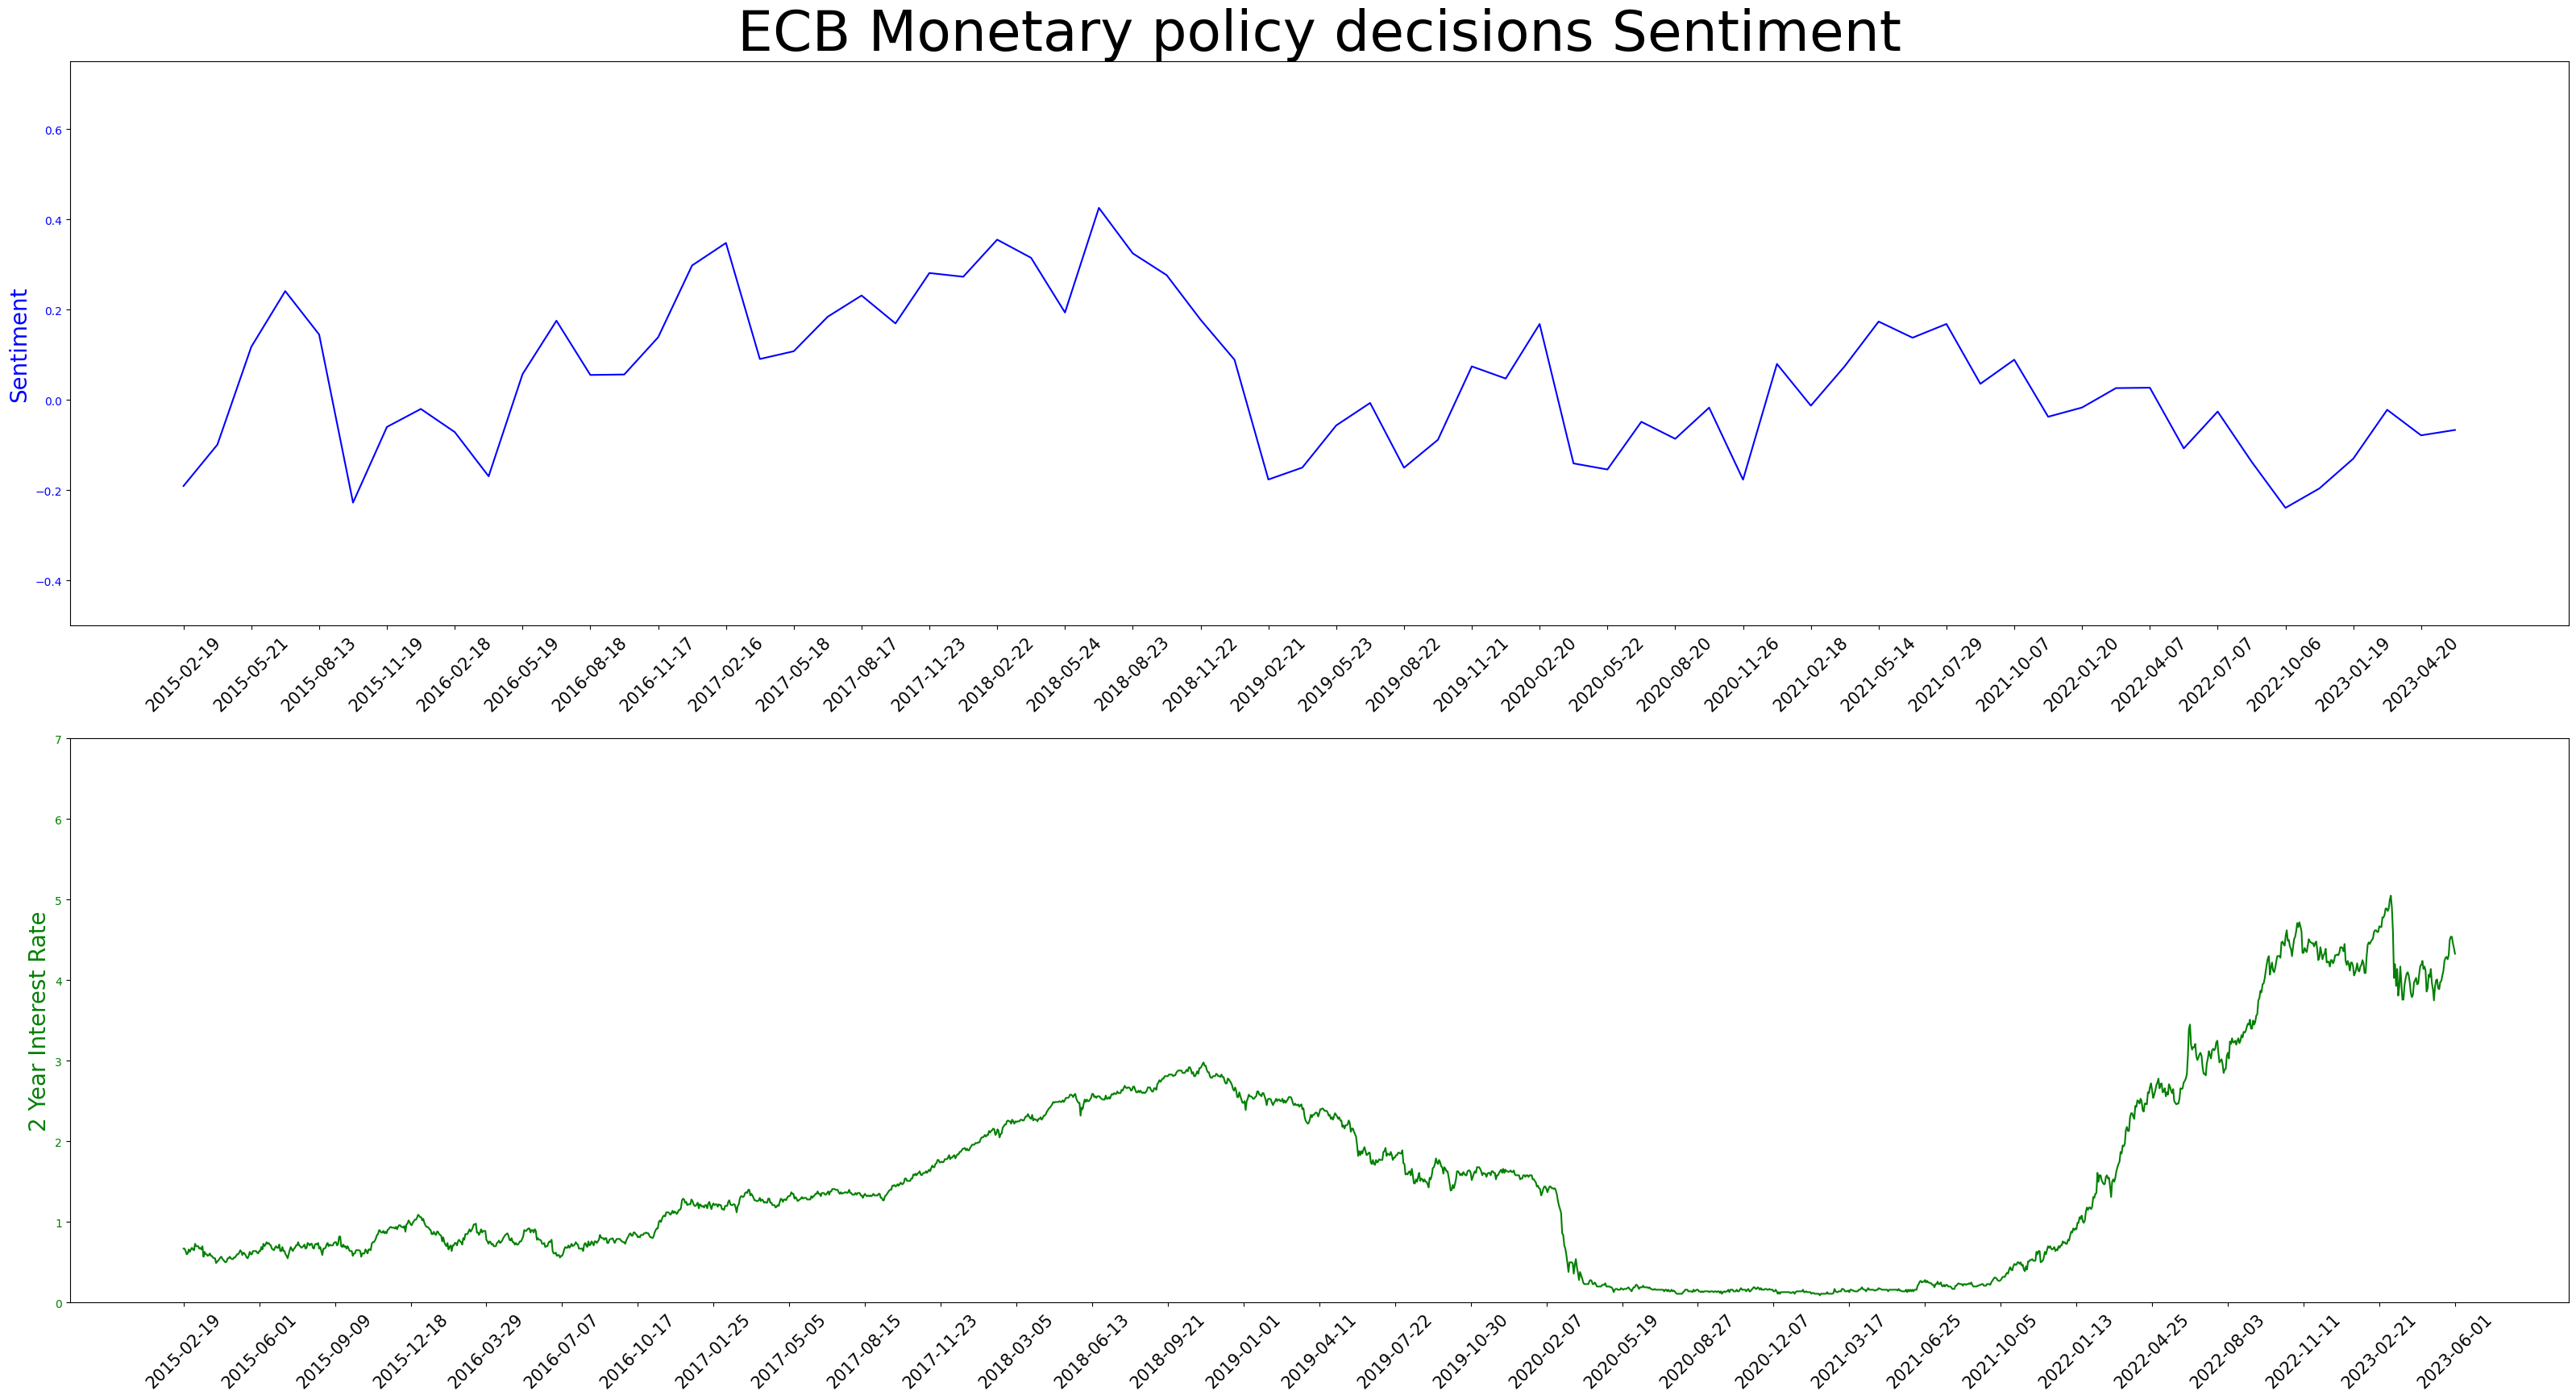

In [15]:

# Create a list of x-axis tick positions
num_ticks = 30  # Adjust this number as needed
x_tick_positions_0 = df1['date'].iloc[::len(df1) // num_ticks].tolist()
x_tick_positions_1 = ir1['date'].iloc[::len(ir1) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 20))
#axs = [axs, axs.twiny()]

axs[0].plot(df1['date'], df1['sentiment'], color='blue')

#axs[1] = axs[0].twinx()
axs[1].plot(ir1['date'], ir1['IR2'], color='green')

axs[0].tick_params(axis='y', labelcolor='blue')
axs[1].tick_params(axis='y', labelcolor='green')

# Set Y axis scales so that they both fit evenly on the chart
axs[0].set_ylim(-0.5, 0.75)
axs[1].set_ylim(0, 7)

axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_ylabel('Sentiment', color='blue', fontsize=20)
axs[1].set_ylabel('2 Year Interest Rate', color='green', fontsize=20)

axs[0].set_title(f'{Body} {Model} Sentiment', fontsize=50)

plt.show()

In [16]:
print(df1.head())
print(df_var.head())

         date  positive  negative  neutral  sentiment
0  2015-02-19    0.2772    0.4071   0.3157    -0.1905
1  2015-04-02    0.3591    0.4101   0.2308    -0.0987
2  2015-05-21    0.4399    0.3506   0.2095     0.1180
3  2015-07-02    0.5091    0.2797   0.2111     0.2414
4  2015-08-13    0.4748    0.3322   0.1930     0.1453
         date  sentiment_mean  sentiment_median  sentiment_var     sd
0  2015-02-19         -0.1905            0.0000         0.6581 0.8112
1  2015-04-02         -0.0987            0.0000         0.7650 0.8747
2  2015-05-21          0.1180            0.0000         0.7922 0.8901
3  2015-07-02          0.2414            1.0000         0.7506 0.8664
4  2015-08-13          0.1453            0.0000         0.7990 0.8939


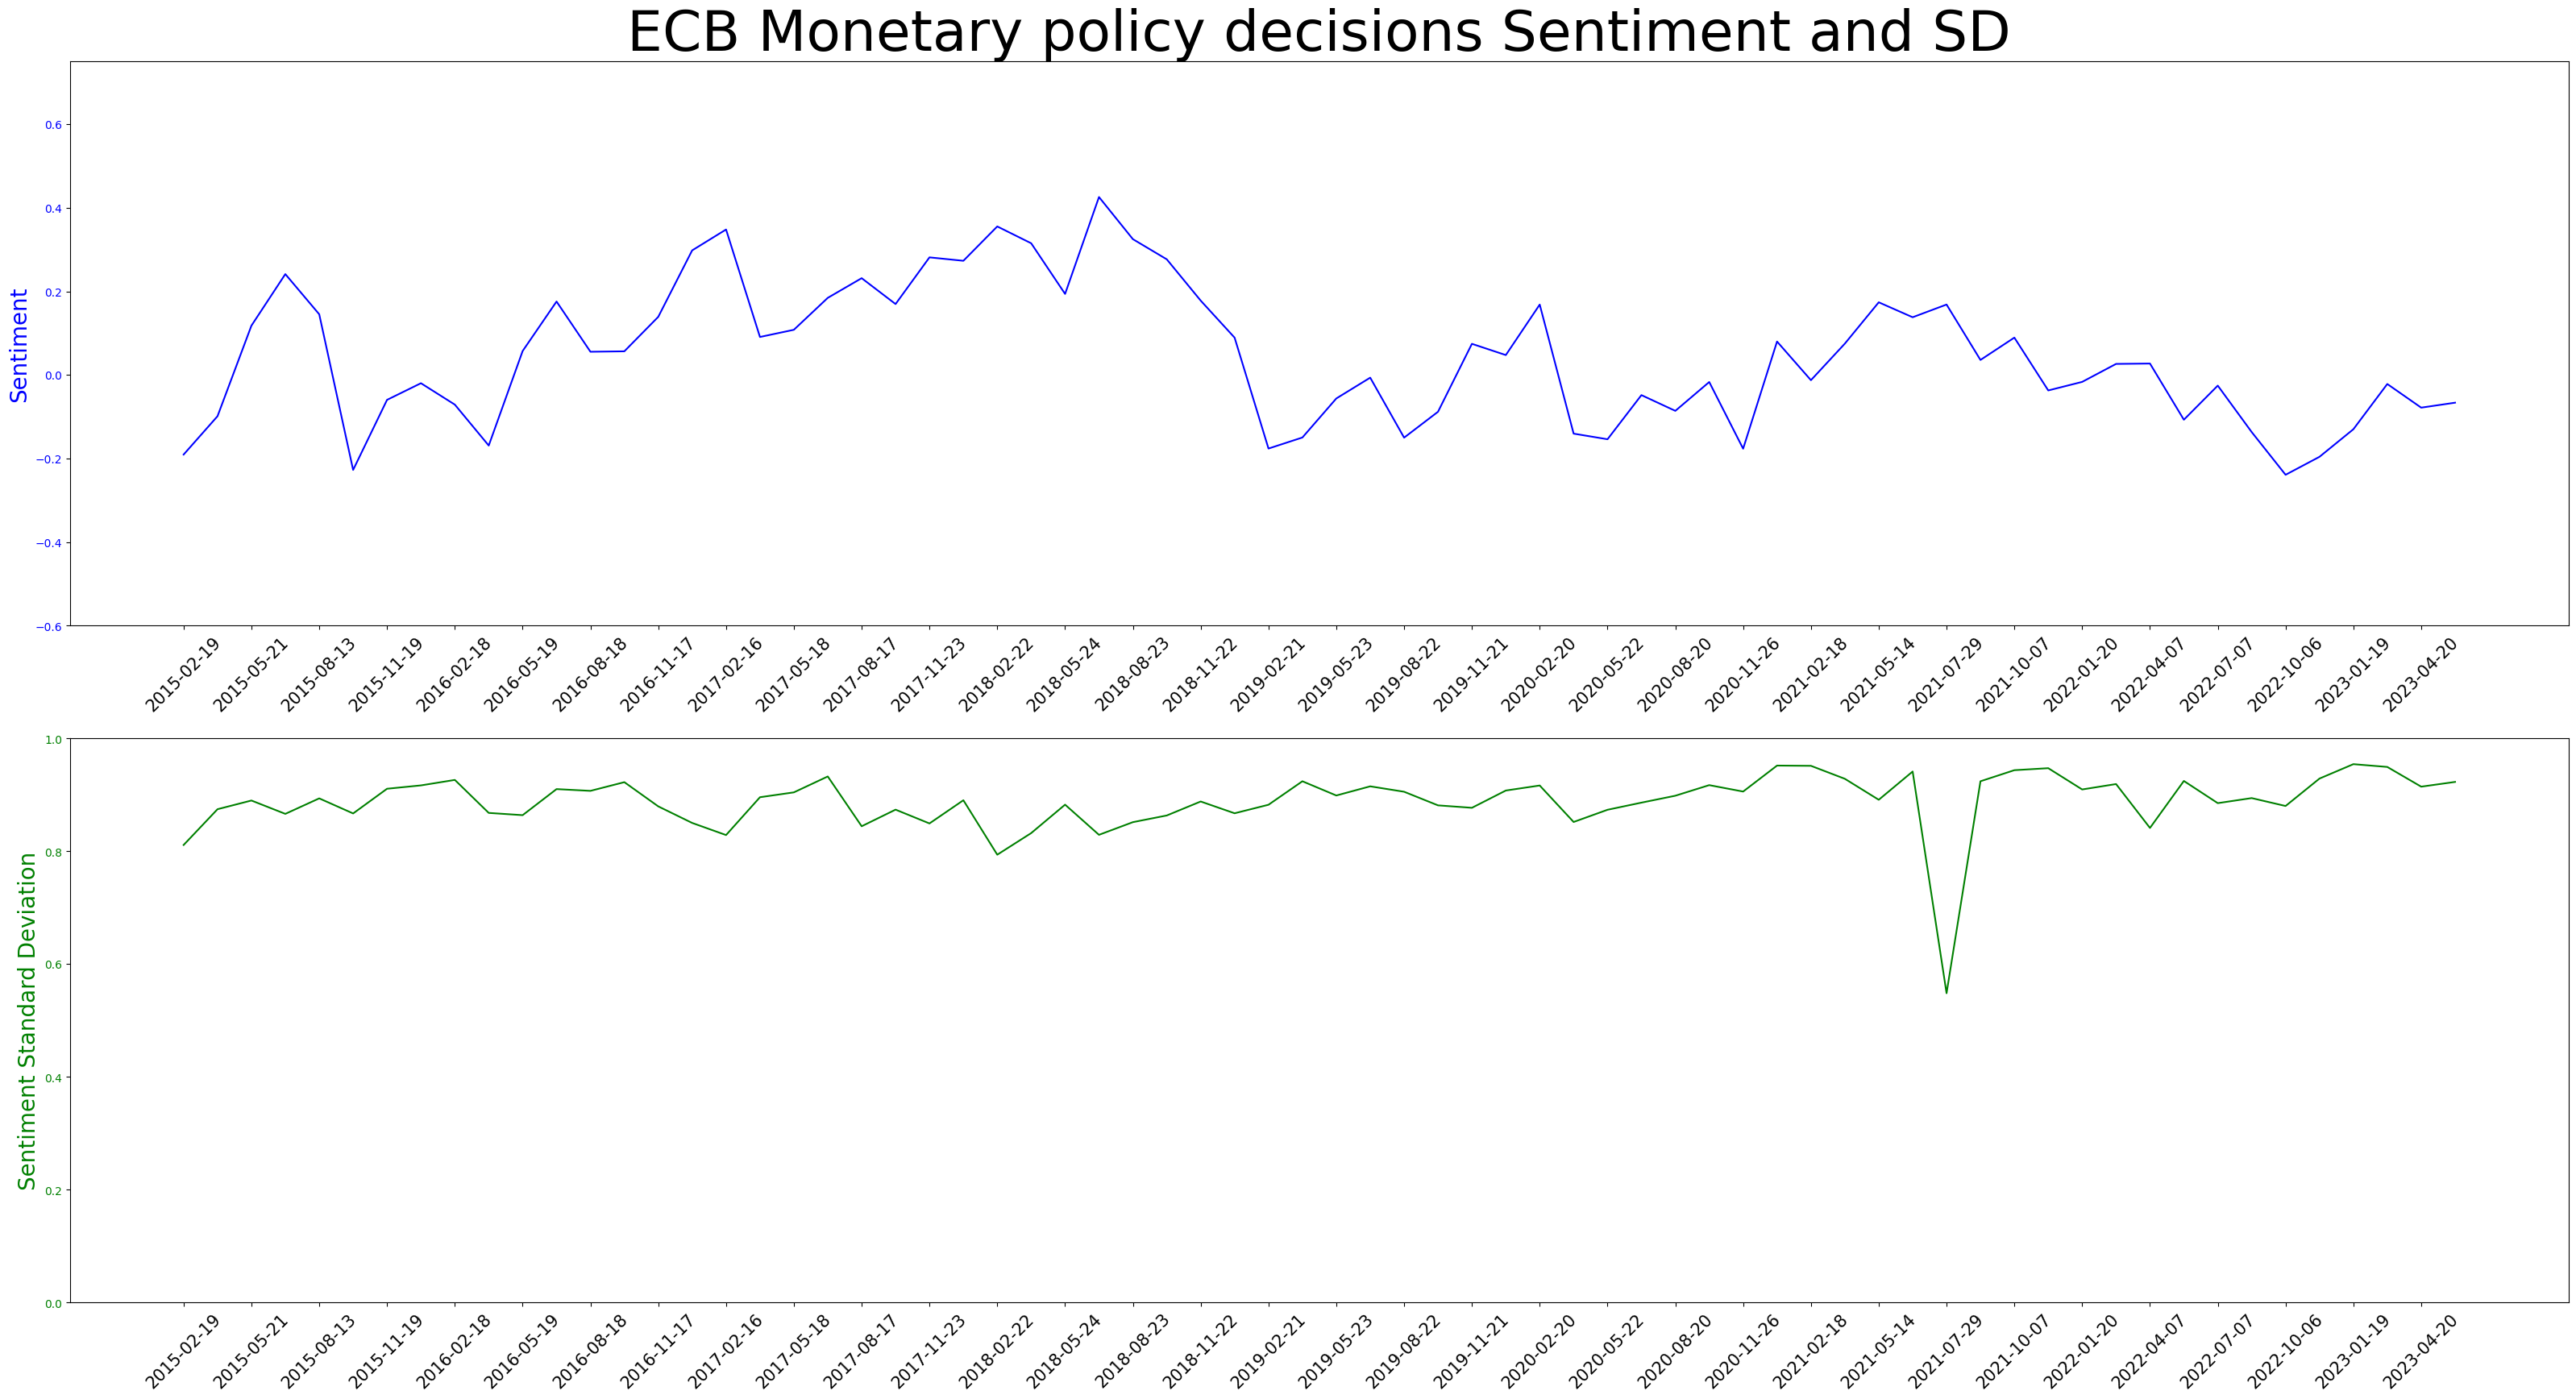

In [17]:

# Create a list of x-axis tick positions
num_ticks = 30  # Adjust this number as needed
x_tick_positions_0 = df1['date'].iloc[::len(df1) // num_ticks].tolist()
x_tick_positions_1 = df_var['date'].iloc[::len(df_var) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 20))
#axs = [axs, axs.twiny()]

axs[0].plot(df1['date'], df1['sentiment'], color='blue')

#axs[1] = axs[0].twinx()
axs[1].plot(df_var['date'], df_var['sd'], color='green')

axs[0].tick_params(axis='y', labelcolor='blue')
axs[1].tick_params(axis='y', labelcolor='green')

# Set Y axis scales so that they both fit evenly on the chart
axs[0].set_ylim(-0.6, 0.75)
axs[1].set_ylim(0, 1)

axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_ylabel('Sentiment', color='blue', fontsize=20)
axs[1].set_ylabel('Sentiment Standard Deviation', color='green', fontsize=20)

axs[0].set_title(f'{Body} {Model} Sentiment and SD', fontsize=50)

plt.show()

In [18]:
df_num_sent['diff'] = df_num_sent['pos'] - df_num_sent['neg']
df1['diff'] = df1['positive'] - df1['negative']

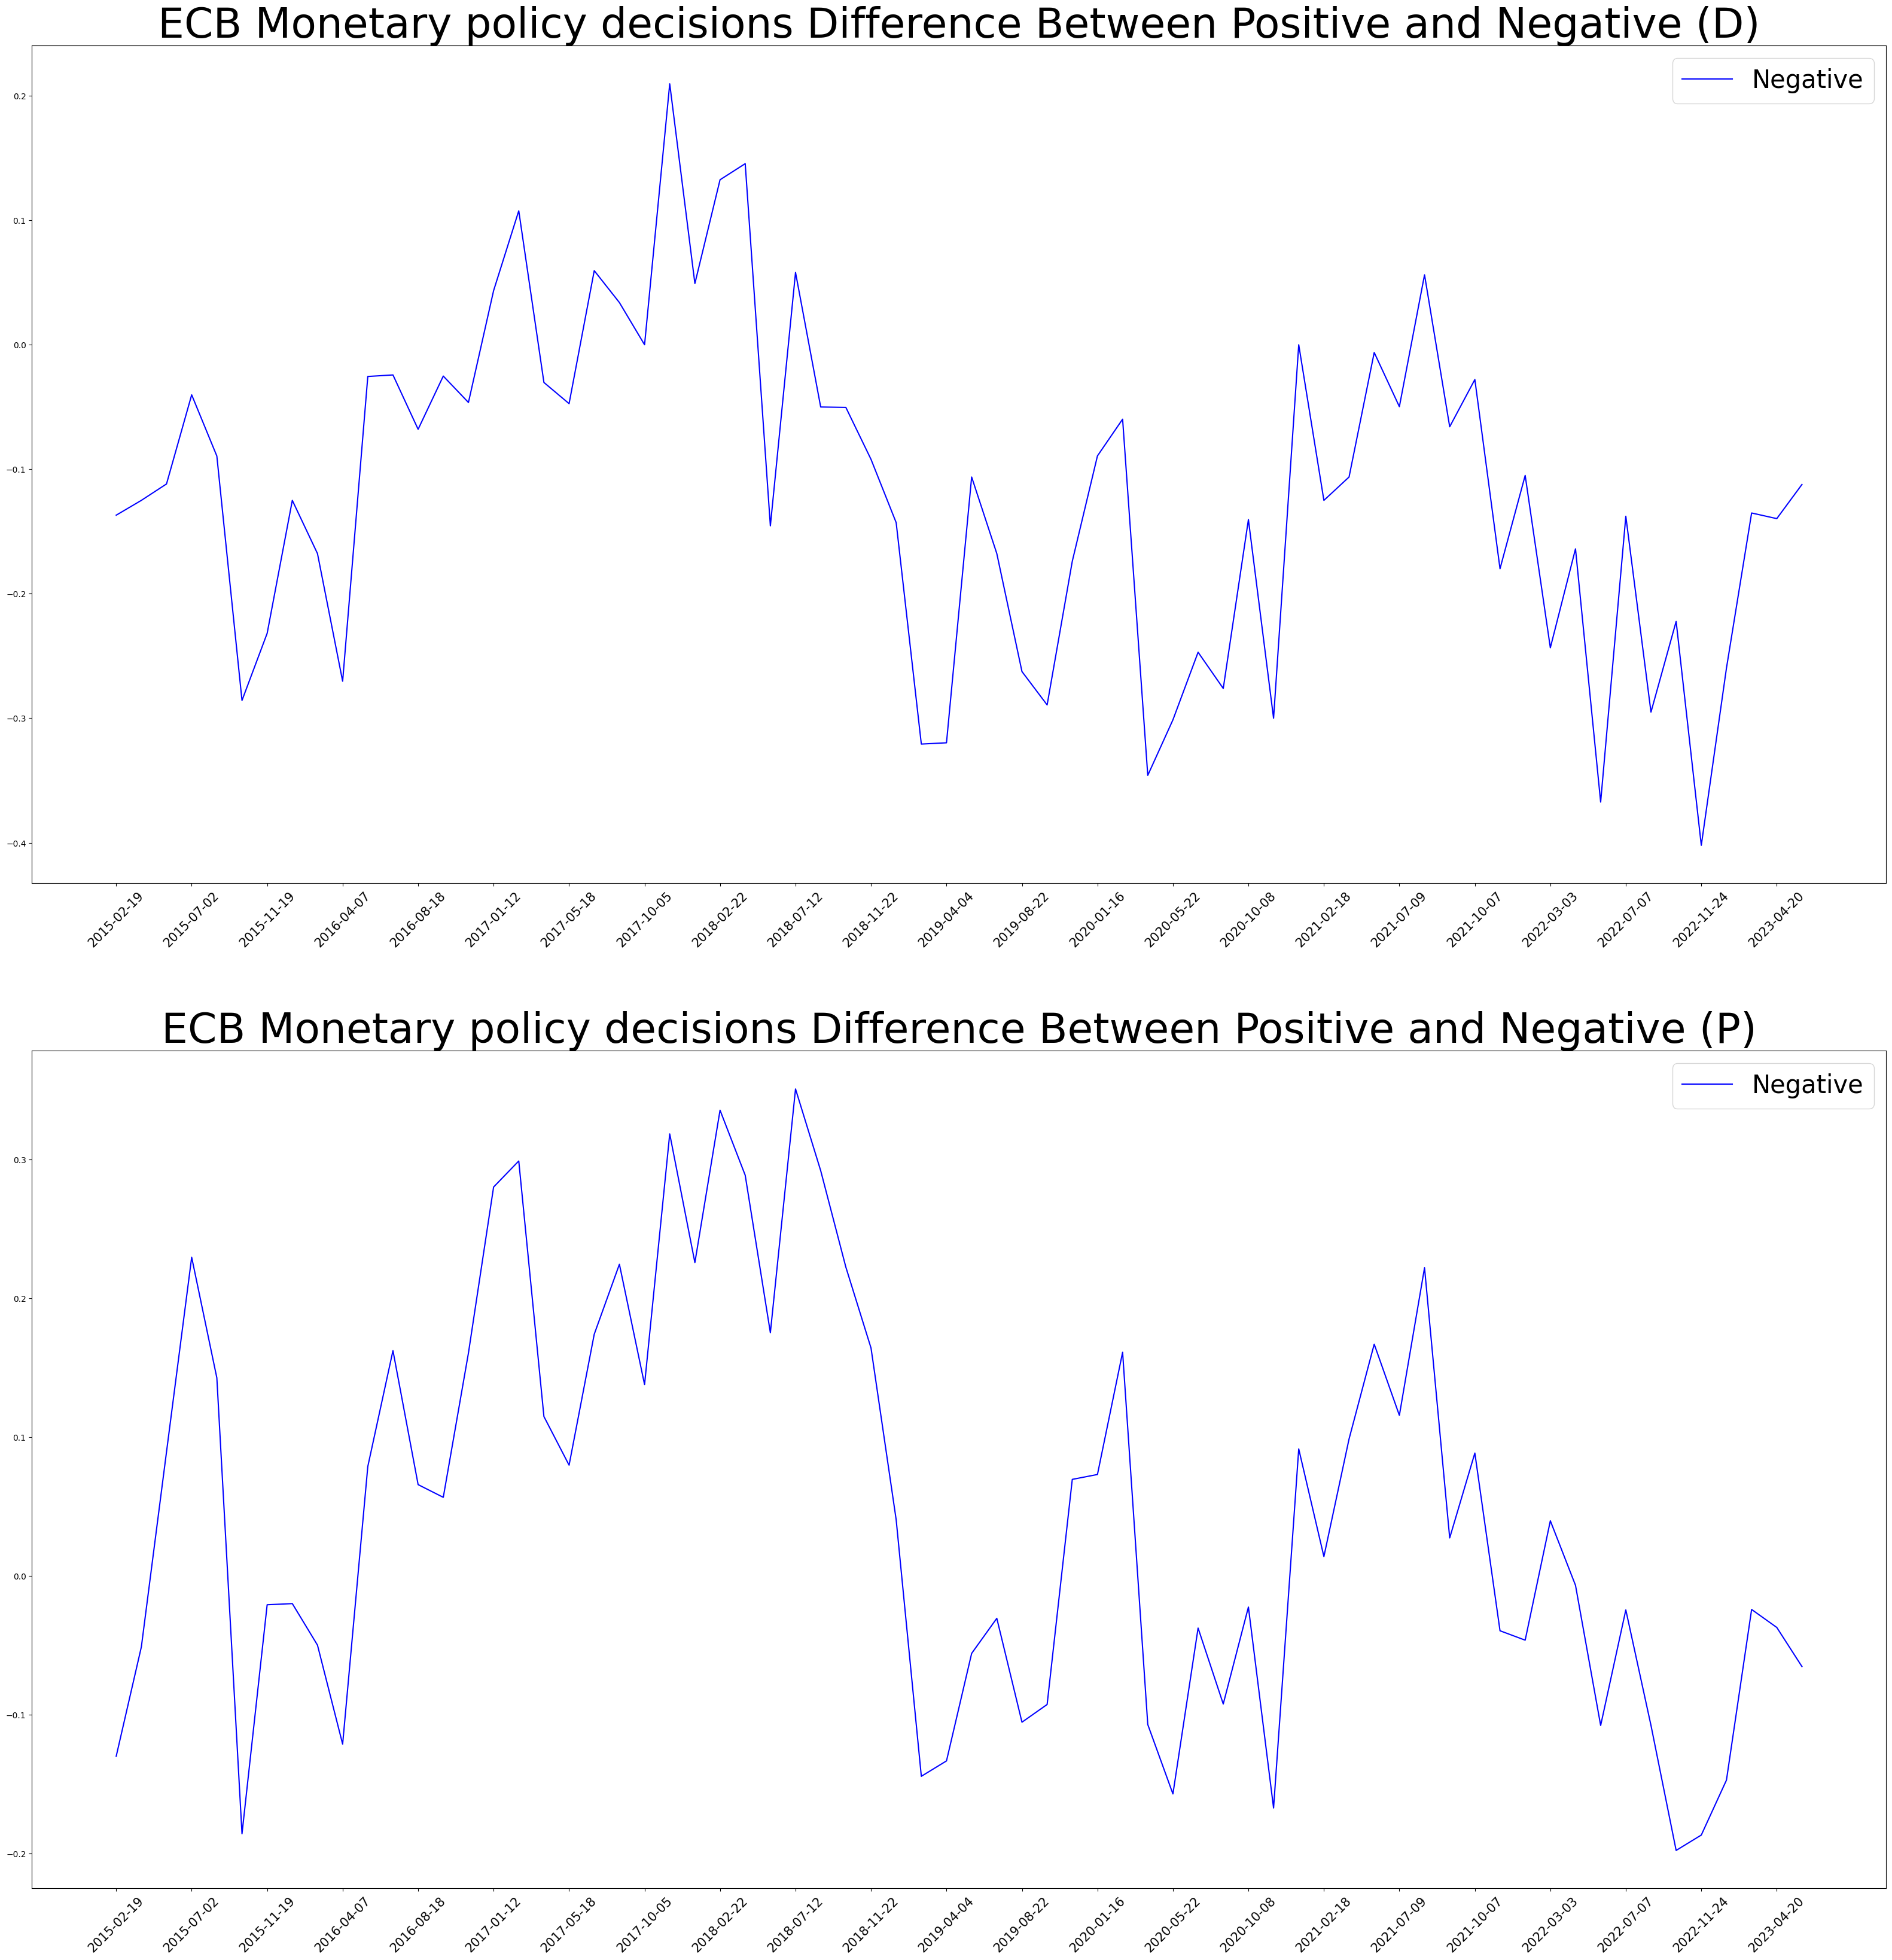

In [19]:
#Create a list of x-axis tick positions
num_ticks = 20  # Adjust this number as needed
x_tick_positions_0 = df_num_sent['date'].iloc[::len(df_num_sent) // num_ticks].tolist()
x_tick_positions_1 = df1['date'].iloc[::len(df1) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 40))

axs[0].plot(df_num_sent['date'], df_num_sent['diff'], color='blue')
axs[1].plot(df1['date'], df1['diff'], color='blue')

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_title(f'{Body} {Model} Difference Between Positive and Negative (D)', fontsize=50)
axs[1].set_title(f'{Body} {Model} Difference Between Positive and Negative (P)', fontsize=50)

axs[0].legend(['Negative', 'Neutral', 'Positive'], fontsize=30)
axs[1].legend(['Negative', 'Neutral', 'Positive'], fontsize=30)

plt.show()

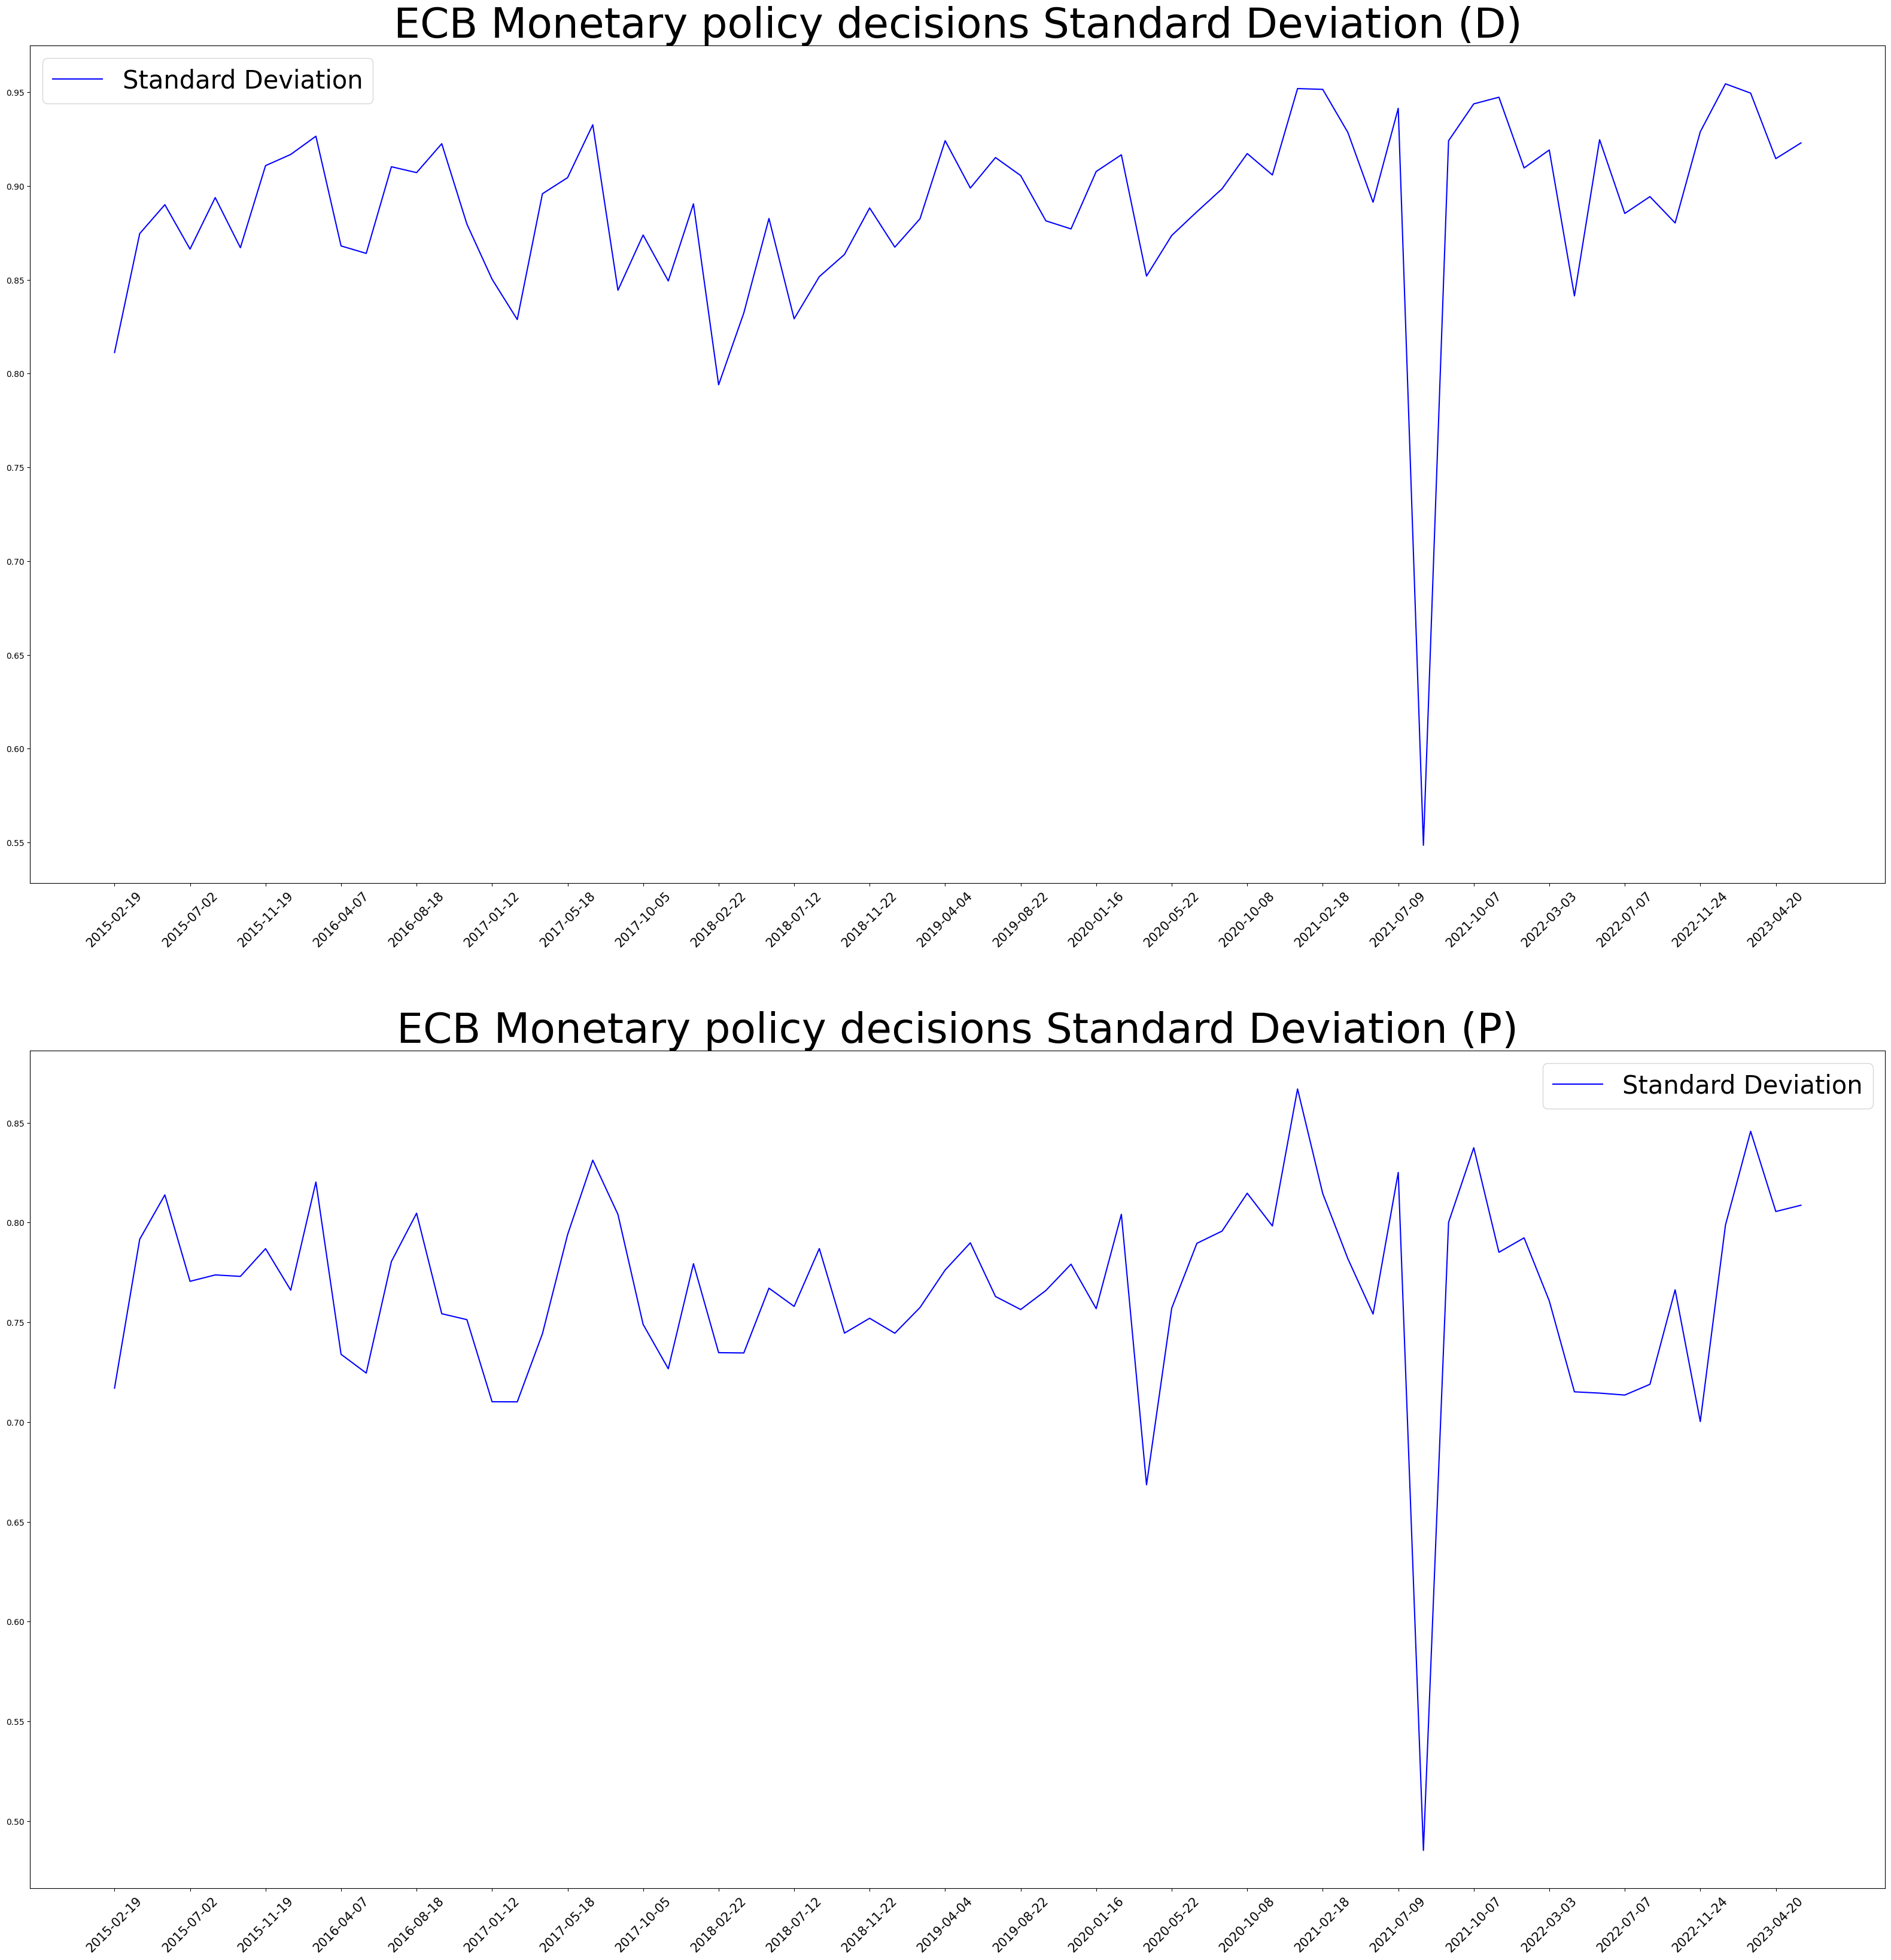

In [20]:
#Create a list of x-axis tick positions
num_ticks = 20  # Adjust this number as needed
x_tick_positions_0 = df_var['date'].iloc[::len(df_var) // num_ticks].tolist()
x_tick_positions_1 = df_var2['date'].iloc[::len(df_var2) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(40, 40))

axs[0].plot(df_var['date'], df_var['sd'], color='blue')
axs[1].plot(df_var2['date'], df_var2['sd'], color='blue')

# Set x-axis ticks for both subplots
axs[0].set_xticks(x_tick_positions_0)
axs[1].set_xticks(x_tick_positions_1)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)

axs[0].set_title(f'{Body} {Model} Standard Deviation (D)', fontsize=50)
axs[1].set_title(f'{Body} {Model} Standard Deviation (P)', fontsize=50)

axs[0].legend(["Standard Deviation"], fontsize=30)
axs[1].legend(["Standard Deviation"], fontsize=30)

plt.show()